## Task 1

In [61]:
import h5py
f = h5py.File('../processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_0.z', 'r')
treeArray = f['t_allpar_new'][()]

In [62]:
import pandas as pd
labels = ['j_q', 'j_g', 'j_w', 'j_z', 'j_t', 'j_undef']
labels_df = pd.DataFrame(treeArray, columns = labels)
labels_df

j_q  j_g  j_w  j_z  j_t  j_undef
0          0    1    0    0    0        0
1          0    1    0    0    0        0
2          0    1    0    0    0        0
3          0    1    0    0    0        0
4          0    1    0    0    0        0
...      ...  ...  ...  ...  ...      ...
5131608    0    0    0    1    0        0
5131609    0    0    0    1    0        0
5131610    0    0    0    1    0        0
5131611    0    0    0    1    0        0
5131612    0    0    0    1    0        0

[5131613 rows x 6 columns]

From the above table we learned that there are 5131613 jets in total

In [63]:
# Method to count jets for specific tagging
def count(name):
    val = labels_df[name].values
    tagged = 0
    for x in val:
        if x == 1:
            tagged += 1
    return tagged

In [64]:
j_q_tagged = count('j_q')
j_q_tagged

776366

In [65]:
j_g_tagged = count('j_g')
j_g_tagged

1399788

In [66]:
j_w_tagged = count('j_w')
j_w_tagged

798037

In [67]:
j_z_tagged = count('j_z')
j_z_tagged

828324

In [68]:
j_t_tagged = count('j_t')
j_t_tagged

1329098

In [69]:
j_undef_tagged = count('j_undef')
j_undef_tagged

0

| Label | Number of jets | Description |
| :----: | :----: | :----: |
| Total | 5131613 | Total statistics |
| q | 776366 | Light (up, down, strange)-quark jet |
| g | 1399788 | Gluon jet |
| w | 798037 | W-boson jet |
| z | 828324 | Z-boson jet |
| t | 1329098 | Top-quark jet |
| undef | 0 | Undefined jet |

## Task 2

In [70]:
jet_k = ['j_mass_mmdt', 'j_pt', 'j_eta']
jet_s = ['j_zlogz', 'j_multiplicity']
ecf = ['j_c1_b0_mmdt', 'j_c1_b1_mmdt', 'j_c1_b2_mmdt', 'j_c2_b1_mmdt', 'j_c2_b2_mmdt', 
      'j_d2_b1_mmdt','j_d2_b2_mmdt', 'j_d2_a1_b1_mmdt', 'j_d2_a1_b2_mmdt', 
      'j_m2_b1_mmdt', 'j_m2_b2_mmdt', 
      'j_n2_b1_mmdt', 'j_n2_b2_mmdt']
h_features_df = pd.DataFrame(treeArray, columns = jet_k + jet_s + ecf + labels)

In [71]:
import matplotlib.pyplot as plt
import numpy as np

In [72]:
def make_1D_plot(name):
    plt.clf()
    key = [name] + labels
    val = h_features_df[key].values
    h_q = []
    h_g = []
    h_w = []
    h_z = []
    h_t = []
    for x in val:
        if x[1] == 1:
            h_q.append(x[0])
        if x[2] == 1:
            h_g.append(x[0])
        if x[3] == 1:
            h_w.append(x[0])
        if x[4] == 1:
            h_z.append(x[0])
        if x[5] == 1:
            h_t.append(x[0])
    plt.hist(h_q, 50, histtype='step', density=True, label='quark', color='blue')
    plt.hist(h_g, 50, histtype='step', density=True, label='gluon', color='orange')
    plt.hist(h_w, 50, histtype='step', density=True, label='W', color='green')
    plt.hist(h_z, 50, histtype='step', density=True, label='Z', color='red')
    plt.hist(h_t, 50, histtype='step', density=True, label='top', color='purple')
    plt.xlabel(name)
    plt.ylabel("Prob. Density")
    plt.legend()
    plt.savefig(name)
    plt.show()

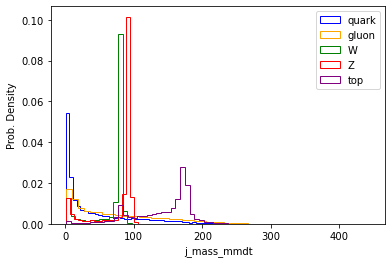

In [73]:
make_1D_plot('j_mass_mmdt')

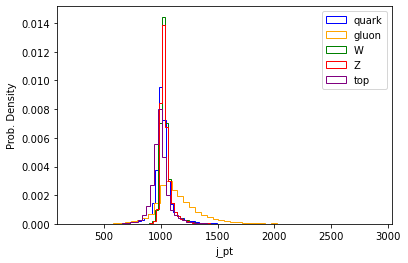

In [74]:
make_1D_plot('j_pt')

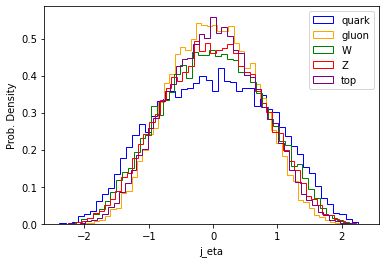

In [75]:
make_1D_plot('j_eta')

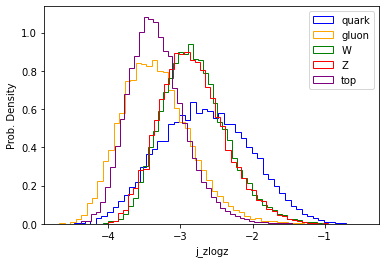

In [76]:
make_1D_plot('j_zlogz')

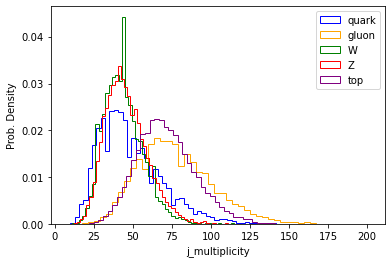

In [77]:
make_1D_plot('j_multiplicity')

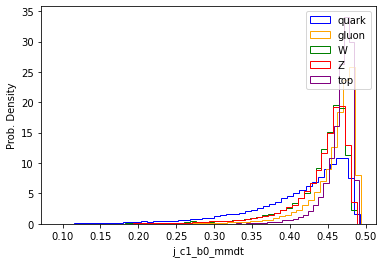

In [78]:
make_1D_plot('j_c1_b0_mmdt')

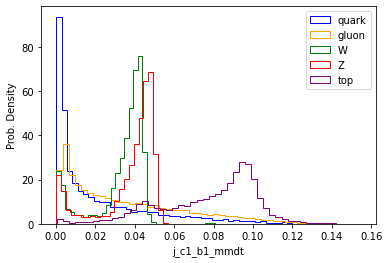

In [79]:
make_1D_plot('j_c1_b1_mmdt')

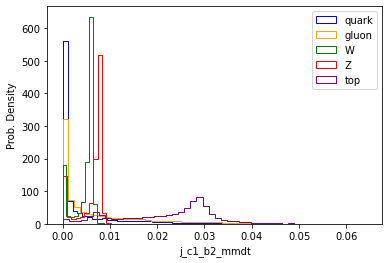

In [80]:
make_1D_plot('j_c1_b2_mmdt')

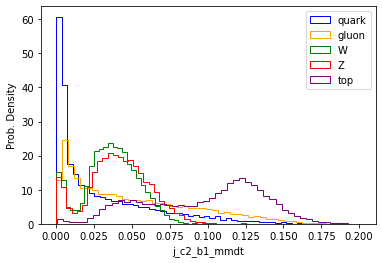

In [81]:
make_1D_plot('j_c2_b1_mmdt')

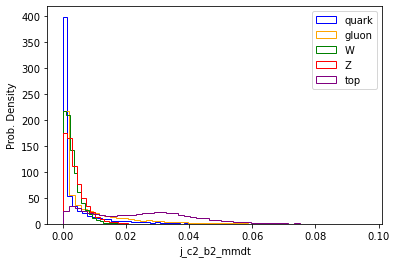

In [82]:
make_1D_plot('j_c2_b2_mmdt')

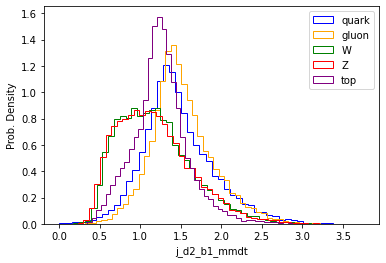

In [83]:
make_1D_plot('j_d2_b1_mmdt')

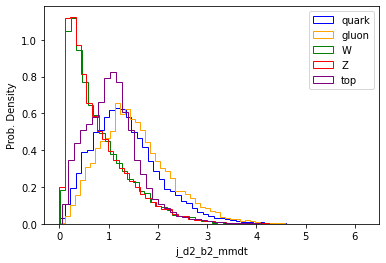

In [84]:
make_1D_plot('j_d2_b2_mmdt')

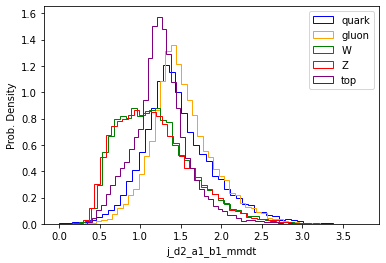

In [85]:
make_1D_plot('j_d2_a1_b1_mmdt')

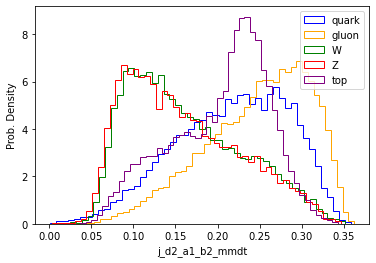

In [86]:
make_1D_plot('j_d2_a1_b2_mmdt')

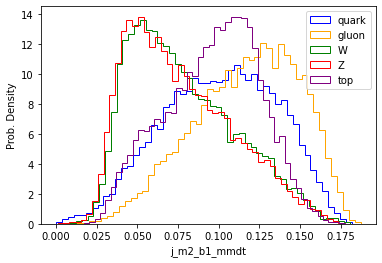

In [87]:
make_1D_plot('j_m2_b1_mmdt')

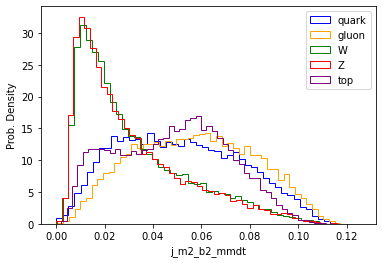

In [88]:
make_1D_plot('j_m2_b2_mmdt')

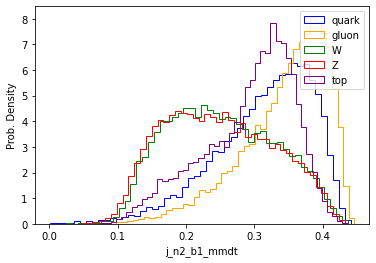

In [89]:
make_1D_plot('j_n2_b1_mmdt')

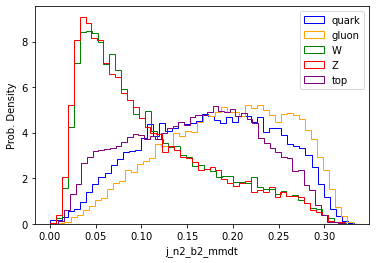

In [90]:
make_1D_plot('j_n2_b2_mmdt')

## Task 3

In [91]:
l_features = ['j1_px', 'j1_py', 'j1_pz', 'j1_e', 'j1_pdgid', 'j1_erel', 'j1_pt', 'j1_ptrel', 'j1_eta', 'j1_etarel', 
             'j1_etarot', 'j1_phi', 'j1_phirel', 'j1_phirot', 'j1_deltaR', 'j1_costheta', 'j1_costhetarel', 
             'j1_e1mcosthetarel']
l_features_df = pd.DataFrame(treeArray, columns = l_features + labels)
# Method for making 1D distribution plot for low level features
def make_1D_plot_low(name):
    plt.clf()
    key = [name] + labels
    val = l_features_df[key].values
    h_q = []
    h_g = []
    h_w = []
    h_z = []
    h_t = []
    for x in val:
        if x[1] == 1:
            h_q.append(x[0])
        if x[2] == 1:
            h_g.append(x[0])
        if x[3] == 1:
            h_w.append(x[0])
        if x[4] == 1:
            h_z.append(x[0])
        if x[5] == 1:
            h_t.append(x[0])
    plt.hist(h_q, 50, histtype='step', density=True, log=True, label='quark', color='blue')
    plt.hist(h_g, 50, histtype='step', density=True, log=True, label='gluon', color='orange')
    plt.hist(h_w, 50, histtype='step', density=True, log=True, label='W', color='green')
    plt.hist(h_z, 50, histtype='step', density=True, log=True, label='Z', color='red')
    plt.hist(h_t, 50, histtype='step', density=True, log=True, label='top', color='purple')
    plt.xlabel(name)
    plt.ylabel("Prob. Density")
    plt.legend()
    plt.savefig(name)
    plt.show()

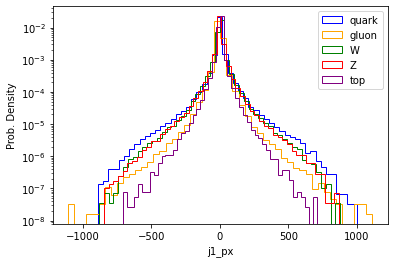

In [92]:
make_1D_plot_low('j1_px')

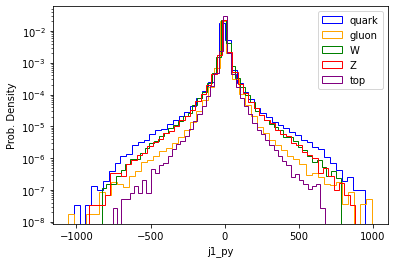

In [93]:
make_1D_plot_low('j1_py')

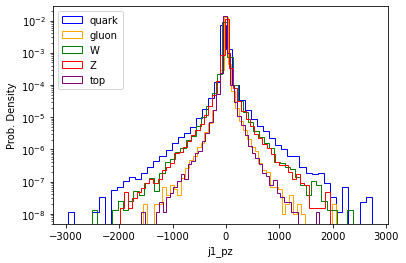

In [94]:
make_1D_plot_low('j1_pz')

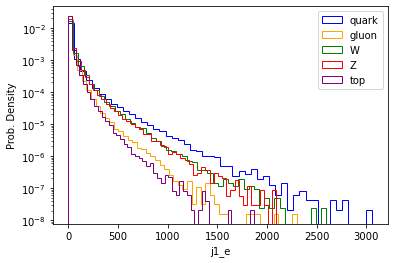

In [95]:
make_1D_plot_low('j1_e')

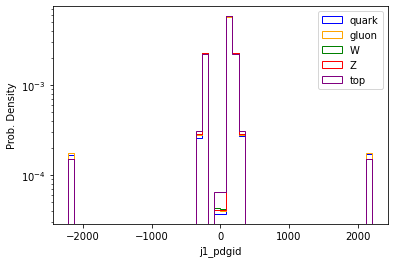

In [96]:
make_1D_plot_low('j1_pdgid')

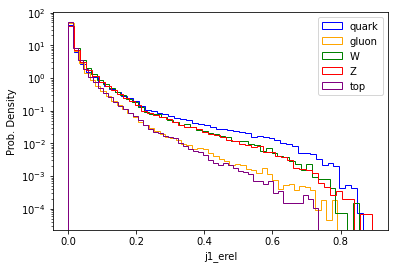

In [97]:
make_1D_plot_low('j1_erel')

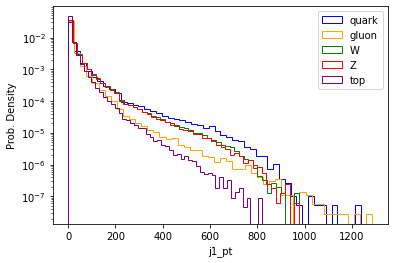

In [98]:
make_1D_plot_low('j1_pt')

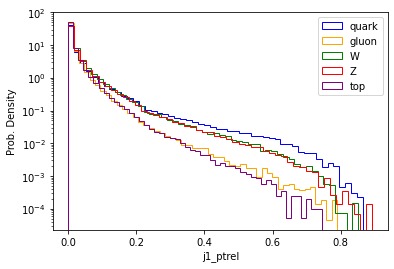

In [99]:
make_1D_plot_low('j1_ptrel')

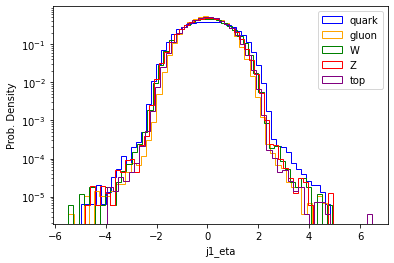

In [100]:
make_1D_plot_low('j1_eta')

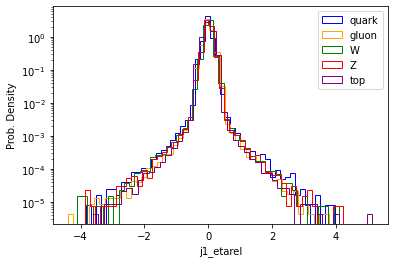

In [101]:
make_1D_plot_low('j1_etarel')

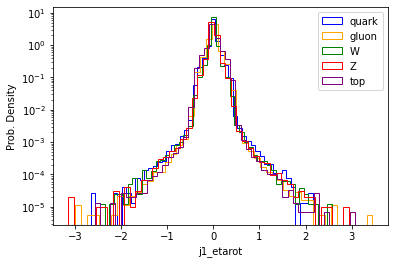

In [102]:
make_1D_plot_low('j1_etarot')

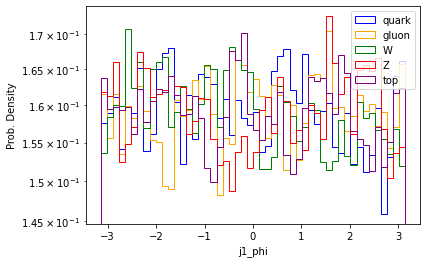

In [103]:
make_1D_plot_low('j1_phi')

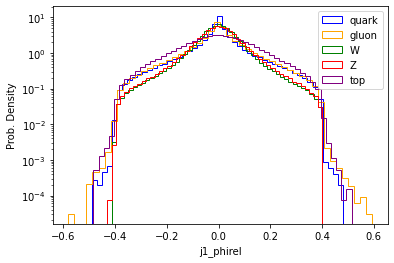

In [104]:
make_1D_plot_low('j1_phirel')

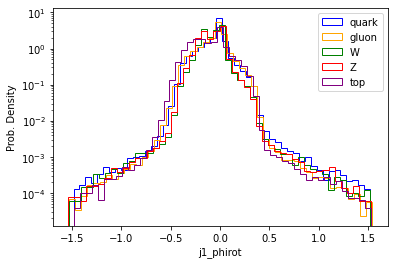

In [105]:
make_1D_plot_low('j1_phirot')

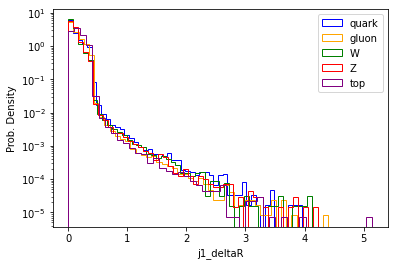

In [106]:
make_1D_plot_low('j1_deltaR')

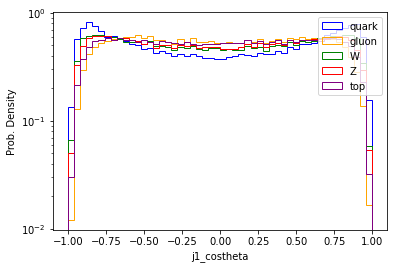

In [107]:
make_1D_plot_low('j1_costheta')

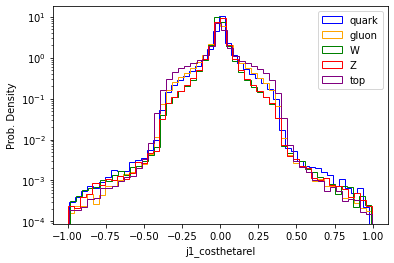

In [108]:
make_1D_plot_low('j1_costhetarel')

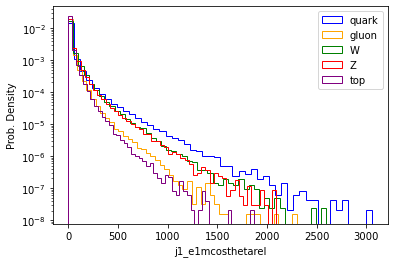

In [109]:
make_1D_plot_low('j1_e1mcosthetarel')

In [110]:
from matplotlib.colors import LogNorm

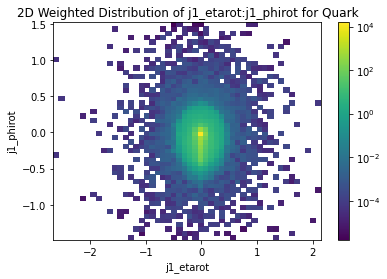

In [111]:
# Make 2D distribution 
plt.clf()
plt.hist2d(x=l_features_df[l_features_df['j_q']==1].j1_etarot, 
           y=l_features_df[l_features_df['j_q']==1].j1_phirot,
           weights=l_features_df[l_features_df['j_q']==1].j1_ptrel,
           bins=50, 
           norm=LogNorm())
plt.colorbar()
plt.title('2D Weighted Distribution of j1_etarot:j1_phirot for Quark')
plt.xlabel('j1_etarot')
plt.ylabel('j1_phirot')
plt.savefig('j1_etarot_j1_phirot_q')
plt.show()

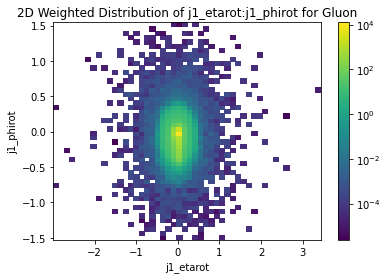

In [112]:
plt.clf()
plt.hist2d(x=l_features_df[l_features_df['j_g']==1].j1_etarot, 
           y=l_features_df[l_features_df['j_g']==1].j1_phirot,
           weights=l_features_df[l_features_df['j_g']==1].j1_ptrel,
           bins=50, 
           norm=LogNorm())
plt.colorbar()
plt.title('2D Weighted Distribution of j1_etarot:j1_phirot for Gluon')
plt.xlabel('j1_etarot')
plt.ylabel('j1_phirot')
plt.savefig('j1_etarot_j1_phirot_g')
plt.show()

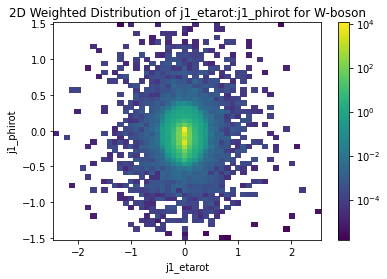

In [113]:
plt.clf()
plt.hist2d(x=l_features_df[l_features_df['j_w']==1].j1_etarot, 
           y=l_features_df[l_features_df['j_w']==1].j1_phirot,
           weights=l_features_df[l_features_df['j_w']==1].j1_ptrel,
           bins=50, 
           norm=LogNorm())
plt.colorbar()
plt.title('2D Weighted Distribution of j1_etarot:j1_phirot for W-boson')
plt.xlabel('j1_etarot')
plt.ylabel('j1_phirot')
plt.savefig('j1_etarot_j1_phirot_w')
plt.show()

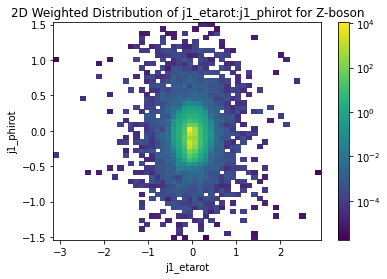

In [114]:
plt.clf()
plt.hist2d(x=l_features_df[l_features_df['j_z']==1].j1_etarot, 
           y=l_features_df[l_features_df['j_z']==1].j1_phirot,
           weights=l_features_df[l_features_df['j_z']==1].j1_ptrel,
           bins=50, 
           norm=LogNorm())
plt.colorbar()
plt.title('2D Weighted Distribution of j1_etarot:j1_phirot for Z-boson')
plt.xlabel('j1_etarot')
plt.ylabel('j1_phirot')
plt.savefig('j1_etarot_j1_phirot_z')
plt.show()

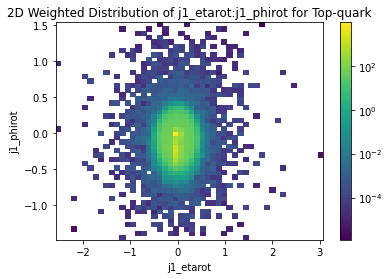

In [115]:
plt.clf()
plt.hist2d(x=l_features_df[l_features_df['j_t']==1].j1_etarot, 
           y=l_features_df[l_features_df['j_t']==1].j1_phirot,
           weights=l_features_df[l_features_df['j_t']==1].j1_ptrel,
           bins=50, 
           norm=LogNorm())
plt.colorbar()
plt.title('2D Weighted Distribution of j1_etarot:j1_phirot for Top-quark')
plt.xlabel('j1_etarot')
plt.ylabel('j1_phirot')
plt.savefig('j1_etarot_j1_phirot_t')
plt.show()

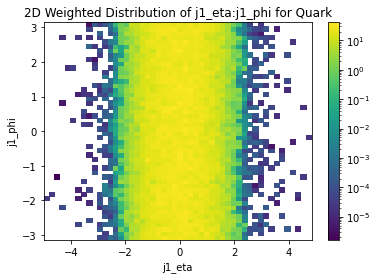

In [116]:
plt.clf()
plt.hist2d(x=l_features_df[l_features_df['j_q']==1].j1_eta, 
           y=l_features_df[l_features_df['j_q']==1].j1_phi,
           weights=l_features_df[l_features_df['j_q']==1].j1_ptrel,
           bins=50, 
           norm=LogNorm())
plt.colorbar()
plt.title('2D Weighted Distribution of j1_eta:j1_phi for Quark')
plt.xlabel('j1_eta')
plt.ylabel('j1_phi')
plt.savefig('j1_eta_j1_phi_q')
plt.show()

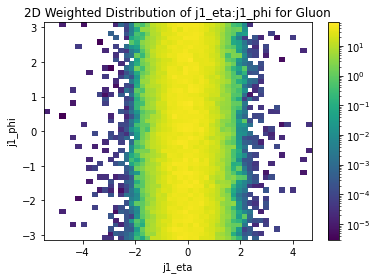

In [117]:
plt.clf()
plt.hist2d(x=l_features_df[l_features_df['j_g']==1].j1_eta, 
           y=l_features_df[l_features_df['j_g']==1].j1_phi,
           weights=l_features_df[l_features_df['j_g']==1].j1_ptrel,
           bins=50, 
           norm=LogNorm())
plt.colorbar()
plt.title('2D Weighted Distribution of j1_eta:j1_phi for Gluon')
plt.xlabel('j1_eta')
plt.ylabel('j1_phi')
plt.savefig('j1_eta_j1_phi_g')
plt.show()

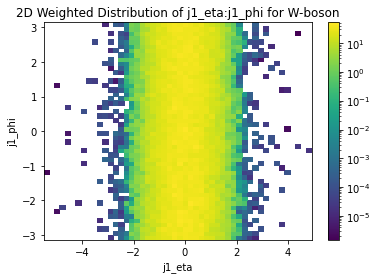

In [118]:
plt.clf()
plt.hist2d(x=l_features_df[l_features_df['j_w']==1].j1_eta, 
           y=l_features_df[l_features_df['j_w']==1].j1_phi,
           weights=l_features_df[l_features_df['j_w']==1].j1_ptrel,
           bins=50, 
           norm=LogNorm())
plt.colorbar()
plt.title('2D Weighted Distribution of j1_eta:j1_phi for W-boson')
plt.xlabel('j1_eta')
plt.ylabel('j1_phi')
plt.savefig('j1_eta_j1_phi_w')
plt.show()

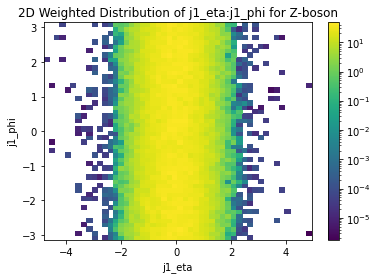

In [119]:
plt.clf()
plt.hist2d(x=l_features_df[l_features_df['j_z']==1].j1_eta, 
           y=l_features_df[l_features_df['j_z']==1].j1_phi,
           weights=l_features_df[l_features_df['j_z']==1].j1_ptrel,
           bins=50, 
           norm=LogNorm())
plt.colorbar()
plt.title('2D Weighted Distribution of j1_eta:j1_phi for Z-boson')
plt.xlabel('j1_eta')
plt.ylabel('j1_phi')
plt.savefig('j1_eta_j1_phi_z')
plt.show()

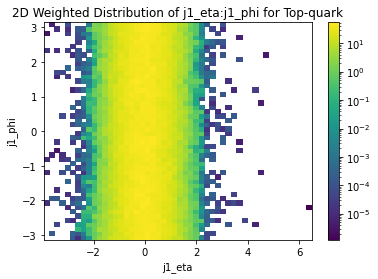

In [120]:
plt.clf()
plt.hist2d(x=l_features_df[l_features_df['j_t']==1].j1_eta, 
           y=l_features_df[l_features_df['j_t']==1].j1_phi,
           weights=l_features_df[l_features_df['j_t']==1].j1_ptrel,
           bins=50, 
           norm=LogNorm())
plt.colorbar()
plt.title('2D Weighted Distribution of j1_eta:j1_phi for Top-quark')
plt.xlabel('j1_eta')
plt.ylabel('j1_phi')
plt.savefig('j1_eta_j1_phi_t')
plt.show()